In [ ]:
# @title Código
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


#----------------------------------------------------------------------------InterFinanzas Senior----------------------------------------------------------------------------
#Prototipo de herramienta digital que permita a los adultos mayores a migrar sus registros financieros al mundo digital de una manera sencilla


#Manejar esta herramienta en POO nos permite manejar varios usuarios a la vez:
#Si instanciamos persona1, persona2 como objetos de Persona(), podremos tener información de dos usuarios (podemos declararlos con sus nombres incluso para mayor personalización)
class Persona:
    def __init__(self):
        self.nombre = None
        self.edad = None
        self.sexo = None
        self.ingreso_actual = None
        self.ingreso_historico = None
        self.gasto_actual = None
        self.gasto_historico = None
        self.mes_actual = None
        self.ingresoActualTotal = None
        self.gastoActualTotal = None
        self.ActualTotal = None
        self.ingresoHistoricoTotal = None
        self.gastoHistoricoTotal = None
        self.HistoricoTotal = None
        self.balance_actual = None
        self.balance_historico = None

    #----------------------------Información Personal---------------------------
    def setNombre(self):
        while True:
            try:
                nombre = input('Dame tu nombre: ')
                nombre = nombre.strip() #Permitir que ingresen espacios accidentales y quitarlos con strip
                if not nombre.isalpha():  #Validamos que sean solo letras
                    raise Exception
            except:
                print("Ingresa correctamente tu nombre\n")
                continue
            else:
                return nombre

    def setEdad(self):
        #Validamos una edad correcta
        while True:
            try:
                edad = int(input('Dame tu edad (Debes ser adulto mayor): '))
                if edad < 60:
                    raise Exception
            except:
                print("Ingrese una edad válida\n")
            else:
                return edad

    def setSexo(self):
        #Validamos un sexo correcta
        while True:
            try:
                sexo = input('Dame tu sexo (M o F exclusivamente): ')
                if (not sexo.isalpha()) or (sexo.lower() not in ['m','f']):
                    raise Exception
            except:
                print('Ingrese correctamente su sexo\n')
            else:
                return sexo

    def setFecha(self):
        while True:
            try:
                mes_actual = input('Ingresa el mes y el año (formato mm/aaaa):\n') #mejorar con regex para que sean dígitos mm y aaaa
                mes_actual = datetime.strptime(mes_actual, "%m/%Y")
            except:
                print("Ingresa correctamente el formato especificado (formato mm/aaaa)")
                continue
            else:
                return mes_actual

    #Validar respuesta para continuar
    def desea_continuar(self):
      while True:
        try:
            respuesta = input('¿Quieres continuar (Si/No)?:\t\t')
            if (not respuesta.isalpha()) or (respuesta.lower() not in ['SI','Si', 'si', 'SÍ','Sí', 'sí', 'NO', 'No','no']): # Sustituir por regex
                raise Exception
        except:
            print('Ingrese una respuesta válida')
            continue
        else:
            match respuesta.lower():
                case 'si':
                    continuar = True
                    break
                case 'no':
                    continuar = False
                    break
      return continuar

    #----------------------------------Ingresos---------------------------------
    def setIngreso(self, concepto):
        while True:
            try:
                ingreso = float(input(f'Dame el ingreso por concepto de {concepto}: '))
                if ingreso < 0:
                    raise Exception
            except:
                print('Ingresa una cantidad válida')
                continue
            else:
                return ingreso

    def setIngresosHistoricos(self):
        lista_ingresos = []
        continuar = True
        while continuar:
            fecha = self.setFecha()
            trabajo = self.setIngreso('Trabajo')
            pension = self.setIngreso('Pensión')
            apoyo_familiar = self.setIngreso('Apoyo Familiar')
            otro_ingreso = self.setIngreso('Otro ingreso')


            info_ingreso = {fecha:{'Trabajo': trabajo,
                                'Pensión': pension,
                                'Apoyo Familiar': apoyo_familiar,
                                'Otro ingreso': otro_ingreso }}
            lista_ingresos.append(info_ingreso)


            continuar = self.desea_continuar()

        # Ordenar la lista de ingresos por la fecha
        lista_ordenada = sorted(lista_ingresos, key=lambda x: list(x.keys())[0])

        # Crear un DataFrame desde la lista ordenada
        datos = []
        for ingreso in lista_ordenada:
            fecha = list(ingreso.keys())[0]
            datos.append(ingreso[fecha])

        # Crear un DataFrame
        df = pd.DataFrame(datos)
        # Convertir las fechas al formato mm/aaaa y asignarlas como índice
        fechas = [list(ingreso.keys())[0] for ingreso in lista_ordenada]

        df.index = fechas
        #Agrupamos y sumamos para el caso en el que el usuario repita fechas
        df = df.groupby(df.index).sum()

        # Convertir las fechas al formato mm/aaaa y asignarlas como índice
        df.index = pd.to_datetime(df.index).strftime('%m/%Y')
        df_ingresos_historicos = df

        return df_ingresos_historicos

    def setIngresosActuales(self):
        lista_ingresos = []
        continuar = True
        while continuar:
            fecha = self.mes_actual
            trabajo = self.setIngreso('Trabajo')
            pension = self.setIngreso('Pensión')
            apoyo_familiar = self.setIngreso('Apoyo Familiar')
            otro_ingreso = self.setIngreso('Otro ingreso')


            info_ingreso = {fecha:{'Trabajo': trabajo,
                                'Pensión': pension,
                                'Apoyo Familiar': apoyo_familiar,
                                'Otro ingreso': otro_ingreso }}
            lista_ingresos.append(info_ingreso)

            continuar = self.desea_continuar()

        #Manejar los indices de manera única evita que se dupliquen filas en el siguiente bloque en el DF
        #Ordenamos las categorías en orden ascendente
        # Ordenar la lista de ingresos por la fecha
        lista_ordenada = sorted(lista_ingresos, key=lambda x: list(x.keys())[0])

        # Crear un DataFrame desde la lista ordenada
        datos = []
        for ingreso in lista_ordenada:
            fecha = list(ingreso.keys())[0]
            datos.append(ingreso[fecha])

        # Crear un DataFrame
        df= pd.DataFrame(datos)
        # Convertir las fechas al formato mm/aaaa y asignarlas como índice
        fechas = [list(ingreso.keys())[0] for ingreso in lista_ordenada]
        fechas_formateadas = [fecha.strftime('%m/%Y') for fecha in fechas]
        df.index = fechas_formateadas
        df_ingresos_actuales = df.groupby(df.index).sum()


        return df_ingresos_actuales

    #-----------------------------------Gastos----------------------------------
    def setGasto(self, concepto):
        while True:
            try:
                ingreso = float(input(f'Dame el gasto por concepto de {concepto}: '))
                if ingreso < 0:
                    raise Exception
            except:
                print('Ingresa una cantidad válida')
                continue
            else:
                return ingreso

    def setGastosHistoricos(self):
        lista_gastos = []
        continuar = True
        while continuar:
            fecha = self.setFecha()
            necesidades_basicas = self.setIngreso('Necesidades básicas (Comida, servicios, etc.)')
            salud = self.setIngreso('Salud (Consultas, medicinas, etc.)')
            transporte = self.setIngreso('Transporte')
            entretenimiento = self.setIngreso('Entretenimiento')
            otros_gastos = self.setGasto('Otros gastos (gasto hormiga, imprevistos, etc.)')


            info_gasto = {fecha:{'Necesidades báscias': necesidades_basicas,
                                'Salud': salud,
                                'Transporte': transporte,
                                'Entretenimiento': entretenimiento,
                                 'Otros gastos': otros_gastos}}
            lista_gastos.append(info_gasto)

            continuar = self.desea_continuar()

        # Ordenar la lista de gastos por la fecha
        lista_ordenada = sorted(lista_gastos, key=lambda x: list(x.keys())[0])

        # Crear un DataFrame desde la lista ordenada
        datos = []
        for gasto in lista_ordenada:
            fecha = list(gasto.keys())[0]
            datos.append(gasto[fecha])

        # Crear un DataFrame
        # Crear un DataFrame
        df = pd.DataFrame(datos)
        # Convertir las fechas al formato mm/aaaa y asignarlas como índice
        fechas = [list(gasto.keys())[0] for gasto in lista_ordenada]

        df.index = fechas
        df = df.groupby(df.index).sum()

        # Convertir las fechas al formato mm/aaaa y asignarlas como índice
        df.index = pd.to_datetime(df.index).strftime('%m/%Y')
        df_gastos_historicos = df

        return df_gastos_historicos

    def setGastosActuales(self):
        lista_gastos = []
        continuar = True
        while continuar:
            fecha = self.mes_actual
            necesidades_basicas = self.setIngreso('Necesidades básicas (Comida, servicios, etc.)')
            salud = self.setIngreso('Salud (Consultas, medicinas, etc.)')
            transporte = self.setIngreso('Transporte')
            entretenimiento = self.setIngreso('Entretenimiento')
            otros_gastos = self.setGasto('Otros gastos (gasto hormiga, imprevistos, etc.)')


            info_gasto = {fecha:{'Necesidades báscias': necesidades_basicas,
                                'Salud': salud,
                                'Transporte': transporte,
                                'Entretenimiento': entretenimiento,
                                 'Otros gastos': otros_gastos}}
            lista_gastos.append(info_gasto)

            continuar = self.desea_continuar()


        # Ordenar la lista de gastos por la fecha
        lista_ordenada = sorted(lista_gastos, key=lambda x: list(x.keys())[0])

        # Crear un DataFrame desde la lista ordenada
        datos = []
        for ingreso in lista_ordenada:
            fecha = list(ingreso.keys())[0]
            datos.append(ingreso[fecha])

        # Crear un DataFrame
        df = pd.DataFrame(datos)

        # Convertir las fechas al formato mm/aaaa y asignarlas como índice
        fechas = [list(ingreso.keys())[0] for ingreso in lista_ordenada]
        fechas_formateadas = [fecha.strftime('%m/%Y') for fecha in fechas]
        df.index = fechas_formateadas
        df_gastos_actuales = df.groupby(df.index).sum()

        return df_gastos_actuales



    #--------------------------Obtener info del usuario-------------------------
    def ObtenerInfoPersonal(self):
        print("----Bienvenido a InterFinanzas Senior-----\n"
        "Tu herramienta digital de finanzas personales\n")
        "Primero, necesitamos tu infomración personal\n"

        self.nombre = self.setNombre()
        self.edad = self.setEdad()
        self.sexo = self.setSexo()

    def obtenerFinanzasActuales(self):
        print("\n")
        print("Pasaremos a registrar su información financiera por conceptos de gastos e ingresos \n"
        'No se preocupe si olvida un importe para algún concepto, puede ingresar varias veces el mismo concepto y se le brindará la suma')
        print( '\n')


        print("-----------------------------Situación financiera del mes actual--------------------------")
        print('Le pediré su ingreso y gastos por conceptos de este mes\n')
        self.mes_actual = self.setFecha()

        print('\n')
        print('Empecemos con los ingresos\n'
              'Los conceptos a completar son:\n'
              '1. Trabajo\n'
              '2. Pensión\n'
              '3. Apoyo familiar\n'
              '4. Otros ingresos\n')

        self.ingreso_actual = self.setIngresosActuales()

        print('\n')
        print('Continuemos con los gastos\n'
              'Los conceptos a completar son:\n'
              '1. Necesidades básicas\n'
              '2. Salud\n'
              '3. Transporte\n'
              '4. Entretenimiento\n'
              '5. Otros gastos\n')
        self.gasto_actual = self.setGastosActuales()



    def obtenerFinanzasHistoricas(self):
        print("\n")

        print("-----------------------------Situación financiera histórica--------------------------")
        print('Ahora te pedire información de tus ingresos y gastos históricos de los meses que desees '
        'con tal de poderte dar más información de tu situación financiera\n')

        print('Puede ingresar los ingresos y gastos respectivamente de cada mes de interés en el orden que desee. (Los conceptos para cada uno serán los mismos que antes)\n'
              'al final se le mostrara la información desde el mes más antiguo al más reciente')

        print('Empecemos con los ingresos')
        self.ingreso_historico = self.setIngresosHistoricos()

        print('\n')

        print('Continuémos con tus gastos')
        self.gasto_historico = self.setGastosHistoricos()
        print('\n')


#-----------------------------------Mostrar info--------------------------------

        #Info actual
        #---------------------Mostrar info del mes reciente---------------------
    def mostrarInfoActual(self):
      #Ingresos actuales
      print('\n')
      print(f"--------------Ingresos, por concepto, del mes actual: {self.mes_actual.strftime('%m/%Y')}--------------")
      print(self.ingreso_actual)
      print('\n')

      #Si un concepto es 0, lo eliminamos para que no se traspapele
      for concepto in self.ingreso_actual.columns:
        if self.ingreso_actual[concepto].sum() == 0:
          self.ingreso_actual.drop(columns=concepto, inplace=True)

      # Iterar por cada fila del DataFrame (este data frame solo tendra una al ser un solo mes, el actual)
      for index, row in self.ingreso_actual.iterrows():
        plt.figure()  # Crear una nueva figura
        row.plot.pie(
            autopct='%2.2f%%',  # Formato de porcentajes
            startangle=90,      # Iniciar desde el ángulo 90°
            labeldistance=1.2,  # Aumenta la distancia de las etiquetas para evitar solapamiento
            pctdistance=0.85,
            title=f"Distribución de ingresos,por concepto, para el mes actual:{self.mes_actual.strftime('%m/%Y')}"
        )
        plt.ylabel('')
        plt.tight_layout()
      plt.show()

      #Gastos actuales
      print(f"--------------Gastos, por concepto, del mes actual: {self.mes_actual.strftime('%m/%Y')}--------------")
      print(self.gasto_actual)
      print('\n')

      #Si un concepto es 0, lo eliminamos para que no se traspapele
      for concepto in self.gasto_actual.columns:
        if self.gasto_actual[concepto].sum() == 0:
          self.gasto_actual.drop(columns=concepto, inplace=True)


      # Iterar por cada fila del DataFrame (este data frame solo tendra una al ser un solo mes, el actual)
      for index, row in self.gasto_actual.iterrows():
        plt.figure()  # Crear una nueva figura
        row.plot.pie(
            autopct='%2.2f%%',  # Formato de porcentajes
            startangle=90,      # Iniciar desde el ángulo 90°
            labeldistance=1.2,  # Aumenta la distancia de las etiquetas para evitar solapamiento
            pctdistance=0.85,      # Iniciar desde el ángulo 90°
            title=f"Distribución de gastos para el mes actual: {self.mes_actual.strftime('%m/%Y')}"
        )
      plt.ylabel('')
      plt.tight_layout()
      plt.show()


    #-------------------------------Info histórica------------------------------

    def mostrarInfoHistorico_porConcepto(self):
      #Ingresos históricos
      lista_meses_ingresos = list(self.ingreso_historico.index)
      print(f"--------------Ingresos históricos, por concepto, del periodo: {lista_meses_ingresos[0]} - {lista_meses_ingresos[-1]}--------------")
      print(self.ingreso_historico)
      print('\n')

      # Si son menos de 6 meses -->  gráfica de columnas. De lo contrario, gráfica de líneas
      if len(lista_meses_ingresos) < 6:
        self.ingreso_historico.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.xlabel('Mes')
        plt.ylabel('Monto')
        plt.title('Ingresos Históricos por concepto')
        plt.show()
      else:
        self.ingreso_historico.plot(kind='line', figsize=(10, 6))
        plt.xlabel('Mes')
        plt.ylabel('Monto')
        plt.title('Ingresos Históricos por concepto')
        plt.show()


      #Gastos históricos
      lista_meses_gastos = list(self.gasto_historico.index)
      print(f"--------------Gastos históricos, por concepto, del periodo : {lista_meses_gastos[0]} - {lista_meses_gastos[-1]}--------------")
      print(self.gasto_historico)
      print('\n')

      # Si son menos de 6 meses -->  gráfica de columnas. De lo contrario, gráfica de líneas
      if len(lista_meses_gastos) < 6:
        self.gasto_historico.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.xlabel('Mes')
        plt.ylabel('Monto')
        plt.title('Gastos Históricos por concepto')
        plt.show()
      else:
        self.gasto_historico.plot(kind='line', figsize=(10, 6))
        plt.xlabel('Mes')
        plt.ylabel('Monto')
        plt.title('Gastos Históricos por concepto')
        plt.show()


    #Info. Histórica total
    def infoHistoricoTotal(self):
        self.ingresoHistoricoTotal = self.ingreso_historico.sum(axis=1)
        self.gastoHistoricoTotal = self.gasto_historico.sum(axis=1)

        #Generar el DataFrame con la info histórica

        self.HistoricoTotal = pd.concat([self.ingresoHistoricoTotal, self.gastoHistoricoTotal], axis = 1)
        self.HistoricoTotal.fillna(0,inplace = True)
        self.HistoricoTotal.columns = ['Ingresos Totales', "Gastos totales"]


        #Ordenar los indices
        self.HistoricoTotal.index = pd.to_datetime(self.HistoricoTotal.index, format='%m/%Y')

        # Ordenar por índice
        self.HistoricoTotal = self.HistoricoTotal.sort_index()

        # Volver a convertir los índices al formato mm/aaaa como cadenas
        self.HistoricoTotal.index = self.HistoricoTotal.index.strftime('%m/%Y')


        print(f"--------------Ingresos y gastos históricos totales del periodo: {self.HistoricoTotal.index[0]} - {self.HistoricoTotal.index[-1]}--------------")
        print(self.HistoricoTotal)
        print('\n')
        self.HistoricoTotal.plot(kind='line', figsize=(10, 6))
        plt.xlabel('Mes')
        plt.ylabel('Monto')
        plt.title('Ingresos y gastos históricos totales')
        plt.show()


    #----------------------------Balance---------------------------------------
    def balanceActual(self):
        self.ingresoActualTotal = self.ingreso_actual.sum(axis=1)
        self.gastoActualTotal = self.gasto_actual.sum(axis=1)

        #Generar el DataFrame con los ingrsos y gastos actuales

        self.ActualTotal = pd.concat([self.ingresoActualTotal, self.gastoActualTotal], axis = 1)
        self.ActualTotal.fillna(0,inplace = True)
        self.ActualTotal.columns = ['Ingresos Totales', "Gastos totales"]


        print(f"--------------Ingresos y gastos totales del mes actual: {self.mes_actual.strftime('%m/%Y')}--------------")
        print(self.ActualTotal)
        print('\n')
        self.ActualTotal.plot(kind='bar', figsize=(10, 6))
        plt.xlabel(f'Ingresos y gastos totales del mes actual')
        plt.ylabel('Monto')
        plt.title('Ingresos y Gastos totales')
        plt.show()




        self.balance_actual = self.ingresoActualTotal - self.gastoActualTotal
        self.balance_actual.columns = ['Saldo']

        print(f"--------------Saldo actual: {self.mes_actual.strftime('%m/%Y')}--------------")
        print(self.balance_actual)
        print('\n')
        self.balance_actual.plot(kind='bar', figsize=(10, 6))
        plt.xlabel('Saldo actual')
        plt.ylabel('Monto')
        plt.title('Saldo actual')
        plt.show()

        print('\n')
        if list(self.balance_actual)[0] > 0:
          print(f'Felicidades, tiene saldo a favor')
        else:
          print('Para el mes actual, usted no tiene capacidad de ahorro')

    def balanceHistorico(self):
        self.balance_historico = self.HistoricoTotal['Ingresos Totales'] - self.HistoricoTotal['Gastos totales']
        self.balance_historico.columns = ['Saldo histórico']

        #Este balance o saldo (a favor o en contra) puede expresarse como una transformación lineal
        # Y := Saldo o Balance
        # X, Cuyas columnas X(1):= Ingresos totales de cada mes, X(2):= Gastos totales de cada mes
        # A:= Matriz asociada a la transformación lineal = [1 -1]
        # Así: Y = AX


        #El código para ello sería:
        #X = np.array(persona.HistoricoTotal)
        #A = np.array([1, -1])

        # Transformación lineal
        #Y = X @ A

        #Sin embargo, se realiza con pandas para facilitar el manejo de los índices, que son fechas


        print(f"--------------Saldo histórico: {self.HistoricoTotal.index[0]} - {self.HistoricoTotal.index[-1]}--------------")
        print(self.balance_historico)
        print('\n')

        self.balance_historico.plot(kind='line', figsize=(10, 6))
        plt.xlabel('Saldo')
        plt.ylabel('Monto')
        plt.title('Saldo histórico')
        plt.show()

 #-----------------------------------Ahorro-------------------------------------
    def ahorro(self):
      capacidad_ahorro_historica = ((self.balance_historico / self.ingresoHistoricoTotal).mean())
      if (self.balance_actual.iloc[0] > 0) or (capacidad_ahorro_historica > 0):
        capacidad_ahorro_actual = (self.balance_actual.iloc[0]) * capacidad_ahorro_historica
        print(f'Basándonos en su capacidad de ahorro histórica, le recomendamos ahorrar la siguiente cantidad: {capacidad_ahorro_actual}')
      else:
        print('Actualmente no tiene capacidad para ahorrar')

#------------------------------Guardar en CSV/Excel-----------------------------
    def exportar(self):
      while True:
        try:
            respuesta = input('Deseas exportar tus tablas generadas a Excel o CSV (Si/No)?:\t\t')
            if (not respuesta.isalpha()) or (respuesta.lower() not in ['SI','Si', 'si', 'NO', 'No','no']):
                raise Exception
        except:
            print('Ingrese una respuesta válida')
            continue
        else:
            match respuesta.lower():
                case 'si':

                  break
                case 'no':
                    continuar = False
                    break

# InterFinanzas Senior

In [ ]:
# @title Información Personal
persona = Persona()
persona.ObtenerInfoPersonal()

----Bienvenido a InterFinanzas Senior-----
Tu herramienta digital de finanzas personales

Dame tu nombre: Josefina
Dame tu edad (Debes ser adulto mayor): 64
Dame tu sexo (M o F exclusivamente): F




Pasaremos a registrar su información financiera por conceptos de gastos e ingresos 
No se preocupe si olvida un importe para algún concepto, puede ingresar varias veces el mismo concepto y se le brindará la suma


-----------------------------Situación financiera del mes actual--------------------------
Le pediré su ingreso y gastos por conceptos de este mes

Ingresa el mes y el año (formato mm/aaaa):
12/2024


Empecemos con los ingresos
Los conceptos a completar son:
1. Trabajo
2. Pensión
3. Apoyo familiar
4. Otros ingresos

Dame el ingreso por concepto de Trabajo: 6000
Dame el ingreso por concepto de Pensión: 0
Dame el ingreso por concepto de Apoyo Familiar: 500
Dame el ingreso por concepto de Otro ingreso: 300
¿Quieres continuar (Si/No)?:		no


Continuemos con los gastos
Los conceptos a completar son:
1. Necesidades básicas
2. Salud
3. Transporte
4. Entretenimiento
5. Otros gastos

Dame el ingreso por concepto de Necesidades básicas (Comida, servicios, etc.): 2000
Dame el ingreso 

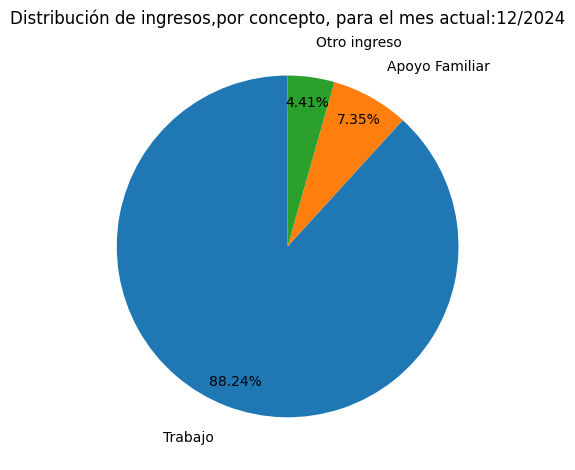

--------------Gastos, por concepto, del mes actual: 12/2024--------------
         Necesidades báscias  Salud  Transporte  Entretenimiento  Otros gastos
12/2024               2000.0  800.0       200.0            500.0         200.0




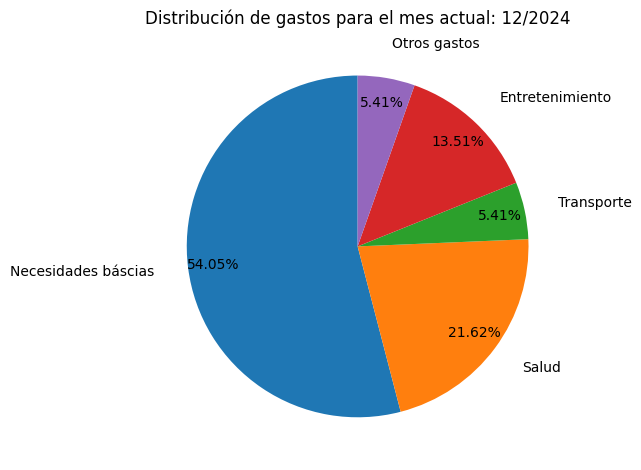

In [ ]:
# @title Situación Financiera actual
persona.obtenerFinanzasActuales()
persona.mostrarInfoActual()


--------------Ingresos y gastos totales del mes actual: 12/2024--------------
         Ingresos Totales  Gastos totales
12/2024            6800.0          3700.0




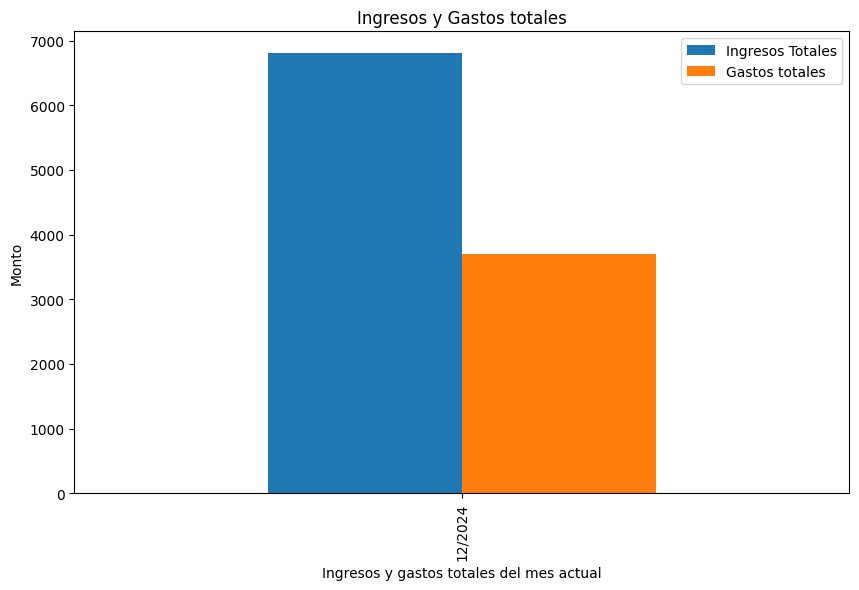

--------------Saldo actual: 12/2024--------------
12/2024    3100.0
dtype: float64




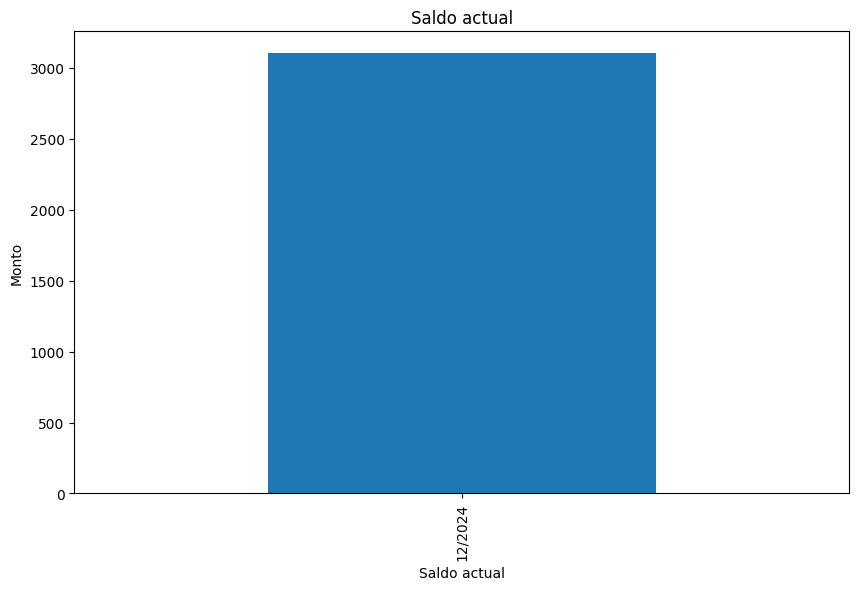



Felicidades, tiene saldo a favor


In [ ]:
# @title Balance Actual
persona.balanceActual()




-----------------------------Situación financiera histórica--------------------------
Ahora te pedire información de tus ingresos y gastos históricos de los meses que desees con tal de poderte dar más información de tu situación financiera

Puede ingresar los ingresos y gastos respectivamente de cada mes de interés en el orden que desee. (Los conceptos para cada uno serán los mismos que antes)
al final se le mostrara la información desde el mes más antiguo al más reciente
Empecemos con los ingresos
Ingresa el mes y el año (formato mm/aaaa):
01/2024
Dame el ingreso por concepto de Trabajo: 4000
Dame el ingreso por concepto de Pensión: 0
Dame el ingreso por concepto de Apoyo Familiar: 500
Dame el ingreso por concepto de Otro ingreso: 50
¿Quieres continuar (Si/No)?:		si
Ingresa el mes y el año (formato mm/aaaa):
02/2024
Dame el ingreso por concepto de Trabajo: 3500
Dame el ingreso por concepto de Pensión: 0
Dame el ingreso por concepto de Apoyo Familiar: 200
Dame el ingreso por concepto

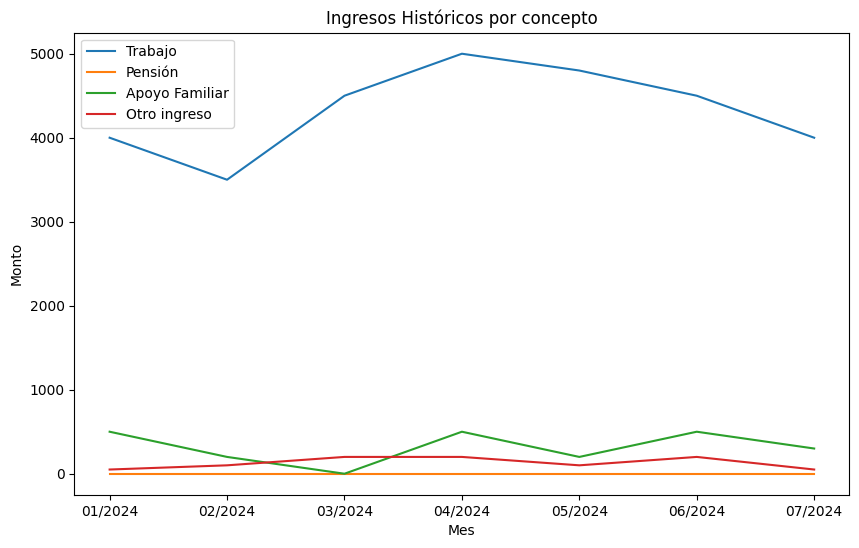

--------------Gastos históricos, por concepto, del periodo : 01/2024 - 07/2024--------------
         Necesidades báscias  Salud  Transporte  Entretenimiento  Otros gastos
01/2024               2000.0    0.0       100.0              0.0         100.0
02/2024               1800.0    0.0        50.0            120.0           0.0
03/2024               2500.0  200.0       150.0            160.0           0.0
04/2024               2600.0  200.0         0.0            200.0           0.0
05/2024               2500.0  100.0        50.0            300.0           0.0
06/2024               2200.0  500.0         0.0              0.0         100.0
07/2024               2500.0  100.0       100.0            150.0           0.0




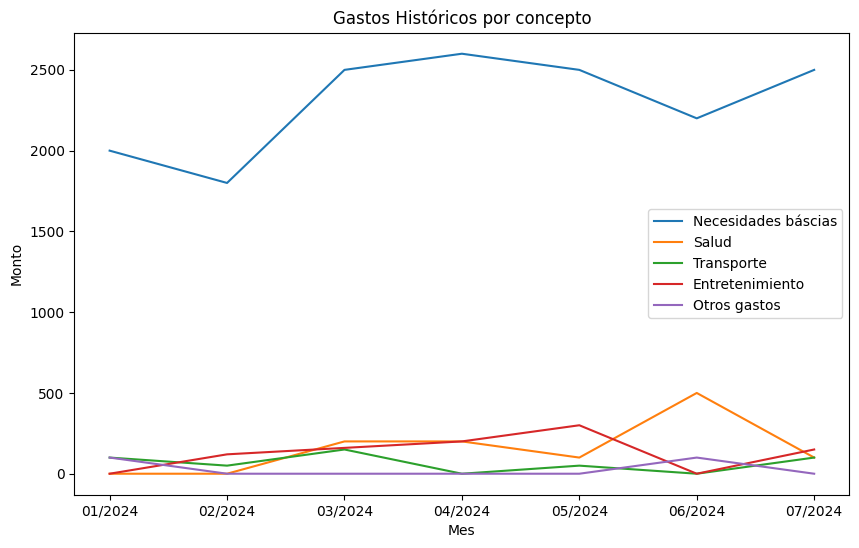

--------------Ingresos y gastos históricos totales del periodo: 01/2024 - 07/2024--------------
         Ingresos Totales  Gastos totales
01/2024            4550.0          2200.0
02/2024            3800.0          1970.0
03/2024            4700.0          3010.0
04/2024            5700.0          3000.0
05/2024            5100.0          2950.0
06/2024            5200.0          2800.0
07/2024            4350.0          2850.0




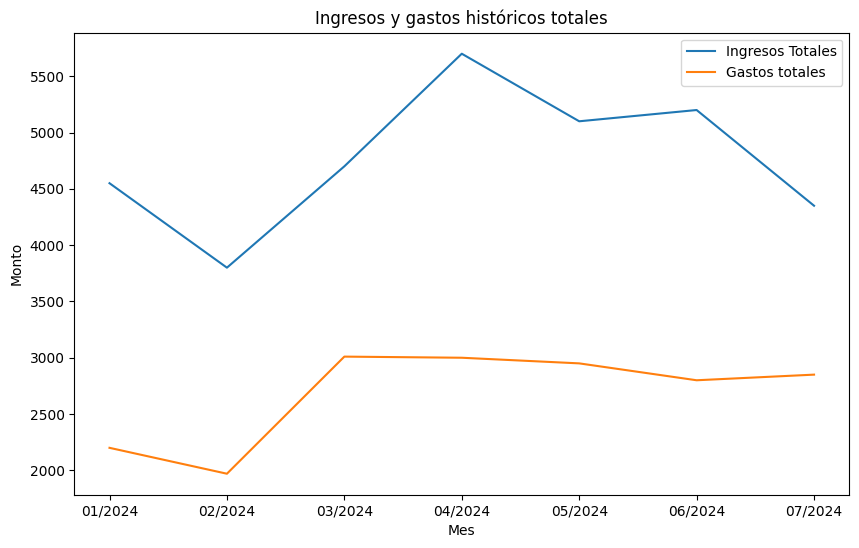

In [ ]:
# @title Situación financiera Histórica
persona.obtenerFinanzasHistoricas()
persona.mostrarInfoHistorico_porConcepto()
persona.infoHistoricoTotal()

--------------Saldo histórico: 01/2024 - 07/2024--------------
01/2024    2350.0
02/2024    1830.0
03/2024    1690.0
04/2024    2700.0
05/2024    2150.0
06/2024    2400.0
07/2024    1500.0
dtype: float64




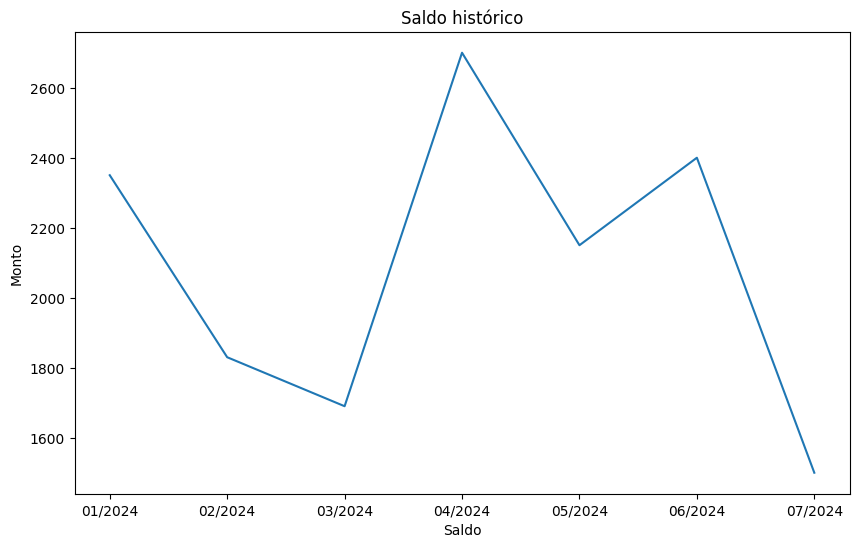

In [ ]:
# @title Balance Histórico
persona.balanceHistorico()

In [ ]:
# @title Tasas de cambio de ingresos y egresos
"""
Markdown / LaTeX:

Podemos definir las funciones $I(t)$ y $G(t)$, como siguen:
$I(t)$ = {(t, I) : t $\in \mathbb{N}$, I $\in \mathbb{R}^{+} \cup {0}$}
(t  funciona como índices para cada mes ingresado por el usuario)


Más formalmente: <br>
$I: \mathbb{N} \to \mathbb{R}^{+} \cup {0}$ <br>
$I(t) = $ Ingreso total registrado en el mes por el usuario

Lo anterior es análogo para $G(t)$.  <br>


<br> Esto nos da funciones discretas, las cuales están bien definidas
como función, ya que a cada variable de tiempo, se le asigna un
único valor de ingreso y de gasto respectivamente <br>
(no necesariamente es inyectiva, dependerá de lo ingresado por el usuario <br>
y nunca será sobreyectiva)
El cálculo de la tasa de cambio en cada punto se limita simplemente
al calculo de la pendiente de cada intervalo lineal que se presentan
Es decir: <br>
$\frac{dI(t)}{dt} = \frac{\Delta I}{\Delta t}$ con $t \in \mathbb{N}$
<br> Sin embargo, al hacer un análisis mensual $\Delta t = 1$ <br>
Por lo tanto: <br>
$\frac{dI(t)}{dt} = \frac{\Delta I}{1} = \Delta I$"""


df_diferencial = persona.HistoricoTotal.diff()
df_diferencial.fillna(0,inplace = True)
df_diferencial['Situación financiera'] = ['Ingresos crecieron más rápido que gastos' if x >y else 'Gastos crecieron más rápido que ingresos' if x < y else 'Ingresos y gastos crecieron igual' for (x, y) in zip(df_diferencial['Ingresos Totales'], df_diferencial['Gastos totales'])]
df_diferencial.columns = ['Variación mensual de Ingresos', 'Variación mensual de Gastos', 'Análisis de situación']
df_diferencial


,Variación mensual de Ingresos,Variación mensual de Gastos,Análisis de situación
01/2024,0.0,0.0,Ingresos y gastos crecieron igual
02/2024,-750.0,-230.0,Gastos crecieron más rápido que ingresos
03/2024,900.0,1040.0,Gastos crecieron más rápido que ingresos
04/2024,1000.0,-10.0,Ingresos crecieron más rápido que gastos
05/2024,-600.0,-50.0,Gastos crecieron más rápido que ingresos
06/2024,100.0,-150.0,Ingresos crecieron más rápido que gastos
07/2024,-850.0,50.0,Gastos crecieron más rápido que ingresos


In [ ]:
# @title Ahorro

#Esto puede mejorarse muchísimo con una regresión lineal para predecir el ahorro. A implementarse cuando lo veamos en semestres posteriores
#Esa también es otra aplicación del Álgebra lineal
persona.ahorro()

Basándonos en su capacidad de ahorro histórica, le recomendamos ahorrar la siguiente cantidad: 1354.8132906778665


In [ ]:
# @title Enviar sus tablas a csv para que pueda almacenar su información
# Ingresos actuales
persona.ingreso_actual.to_csv('ingreso_actual.csv')
persona.gasto_actual.to_csv('gasto_actual.csv')
persona.ingreso_historico.to_csv('ingreso_historico.csv')
persona.gasto_historico.to_csv('gasto_historico.csv')
persona.HistoricoTotal.to_csv('HistoricoTotal.csv')
persona.ActualTotal.to_csv('ActualTotal.csv')
persona.balance_actual.to_csv('balance_actual.csv')
persona.balance_historico.to_csv('balance_historico.csv')
